# **Objective**

The objective of this project is to develop a robust time series forecasting model to accurately predict the daily number of female births in California. By leveraging historical birth data and advanced time series analysis techniques, the goal is to generate reliable forecasts that can assist healthcare organizations, policymakers, and researchers in resource planning, maternity services management, public health policy development, and epidemiological research. Additionally, the project aims to gain insights into trends, patterns, and seasonality in birth rates, contributing to a deeper understanding of maternal and child health dynamics in California.

In [1]:
pip install PyDrive

# ***Import Library***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline

# ***Data Preprocessing***

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file into DataFrame
file_path = '/content/drive/MyDrive/daily-total-female-births-CA.csv'
female_birth_data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
female_birth_data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


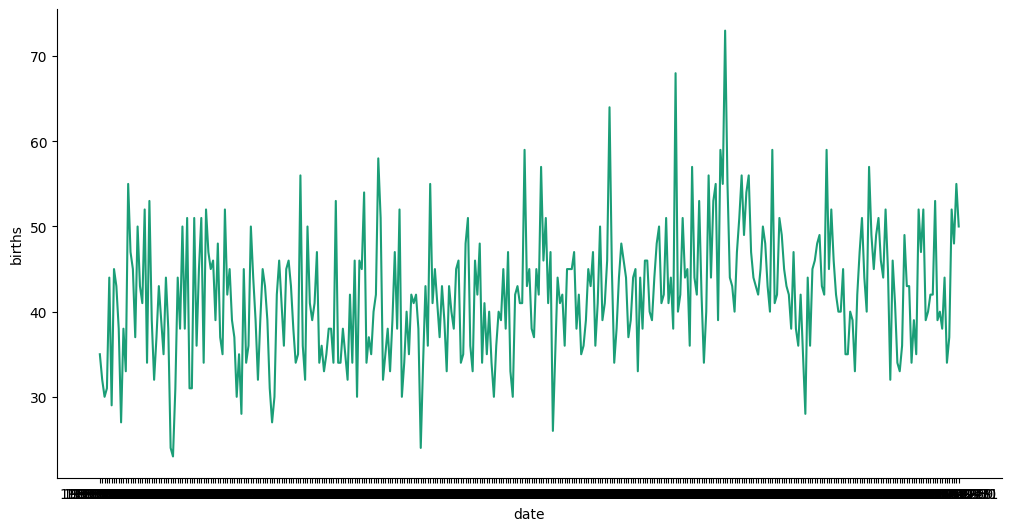

In [6]:
# @title date vs births

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['births']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = female_birth_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('births')

In [7]:
female_birth_data=pd.read_csv("/content/drive/MyDrive/daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])

In [8]:
female_birth_data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [9]:
female_birth_data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<Axes: xlabel='date'>

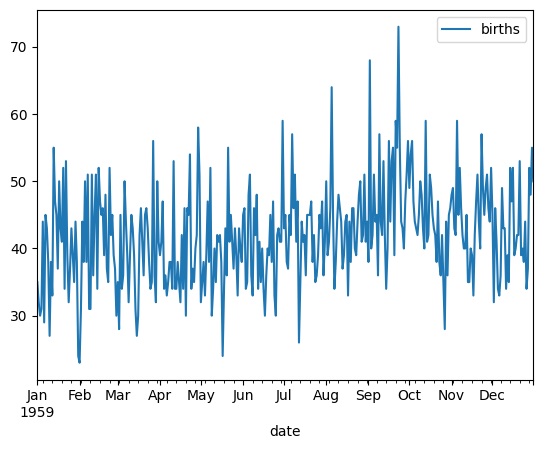

In [10]:
female_birth_data.plot() #almost a stationary series

In [11]:
# also called as smoothing
moving_average_birth=female_birth_data.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic.

In [12]:
moving_average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


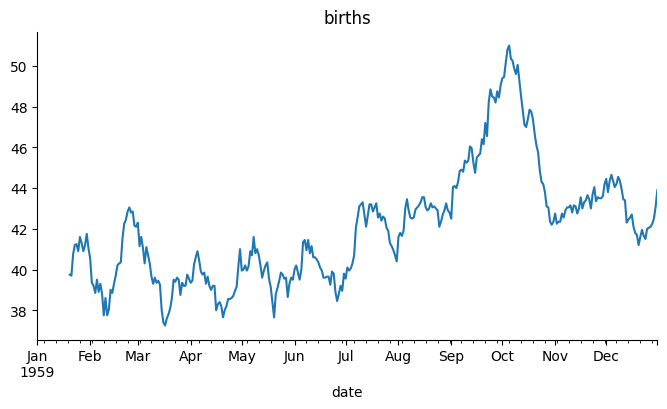

In [13]:
# @title births

from matplotlib import pyplot as plt
moving_average_birth['births'].plot(kind='line', figsize=(8, 4), title='births')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='date'>

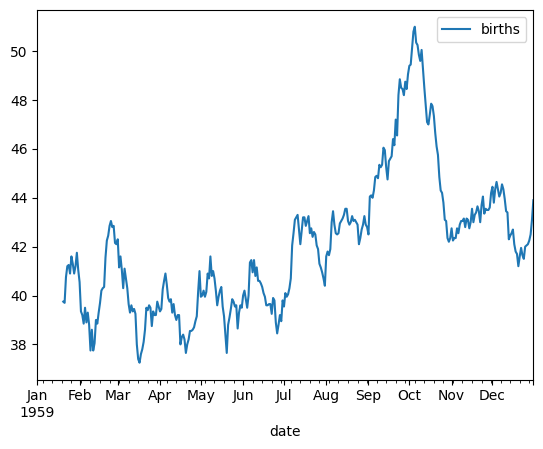

In [14]:
moving_average_birth.plot() # we can see that there is a peak in the month of october

In [15]:
import statsmodels.api as sm

In [16]:
sm.stats.durbin_watson(female_birth_data) # very less correlation

array([0.04624491])

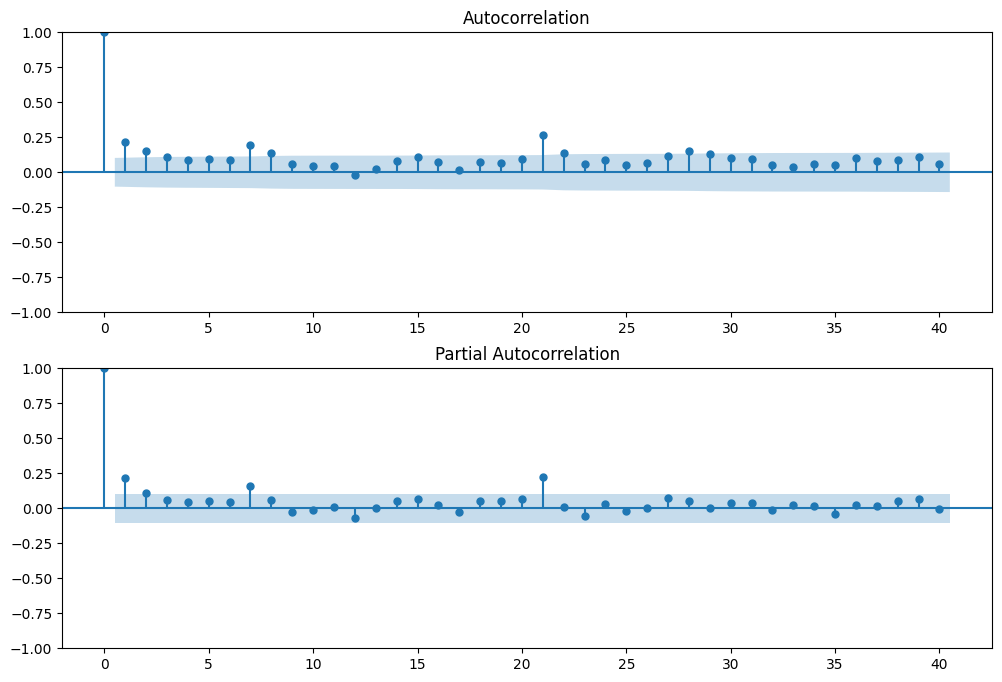

In [17]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(female_birth_data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(female_birth_data, lags=40, ax=ax2)

In [18]:
training_data=female_birth_data[0:320]
test_data=female_birth_data[320:]

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Create and fit the ARIMA model to the training data
arima_model = ARIMA(training_data, order=(2, 1, 3))
arima_result = arima_model.fit()

# Generate forecasts for the testing data
forecast_values = arima_result.forecast(steps=len(test_data))

# Print the forecasted values
print("Forecasted values:", forecast_values)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecasted values: 1959-11-17    42.860639
1959-11-18    43.279106
1959-11-19    43.447916
1959-11-20    43.526927
1959-11-21    43.555955
1959-11-22    43.571614
1959-11-23    43.576066
1959-11-24    43.579509
1959-11-25    43.579920
1959-11-26    43.580825
1959-11-27    43.580710
1959-11-28    43.581006
1959-11-29    43.580895
1959-11-30    43.581011
1959-12-01    43.580948
1959-12-02    43.580998
1959-12-03    43.580967
1959-12-04    43.580990
1959-12-05    43.580974
1959-12-06    43.580985
1959-12-07    43.580978
1959-12-08    43.580983
1959-12-09    43.580979
1959-12-10    43.580982
1959-12-11    43.580980
1959-12-12    43.580981
1959-12-13    43.580981
1959-12-14    43.580981
1959-12-15    43.580981
1959-12-16    43.580981
1959-12-17    43.580981
1959-12-18    43.580981
1959-12-19    43.580981
1959-12-20    43.580981
1959-12-21    43.580981
1959-12-22    43.580981
1959-12-23    43.580981
1959-12-24    43.580981
1959-12-25    43.580981
1959-12-26    43.580981
1959-12-27    43.5809

In [21]:
model=arima_model.fit()

In [22]:
model.aic

2167.8472399195157

In [23]:
pred= model.forecast(steps=45)[0]

In [24]:
pred

42.86063937676242

In [25]:
from sklearn.metrics import mean_squared_error

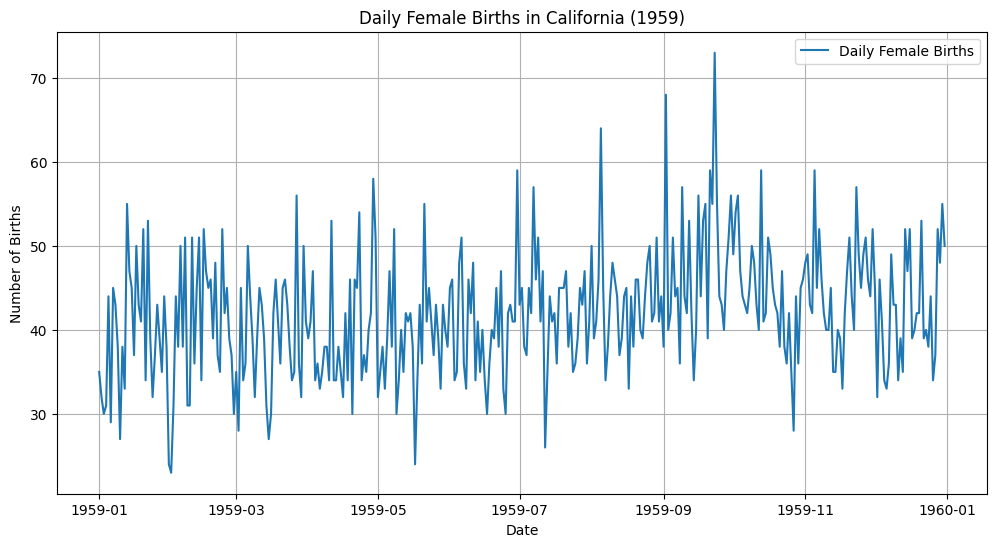

In [27]:
# Convert the index to datetime format and assign it to the 'date' column
female_birth_data['date'] = pd.to_datetime(female_birth_data.index)

# Plot the time series using the 'date' column
plt.figure(figsize=(12, 6))
plt.plot(female_birth_data['date'], female_birth_data['births'], label='Daily Female Births')
plt.title('Daily Female Births in California (1959)')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.grid(True)
plt.legend()
plt.show()

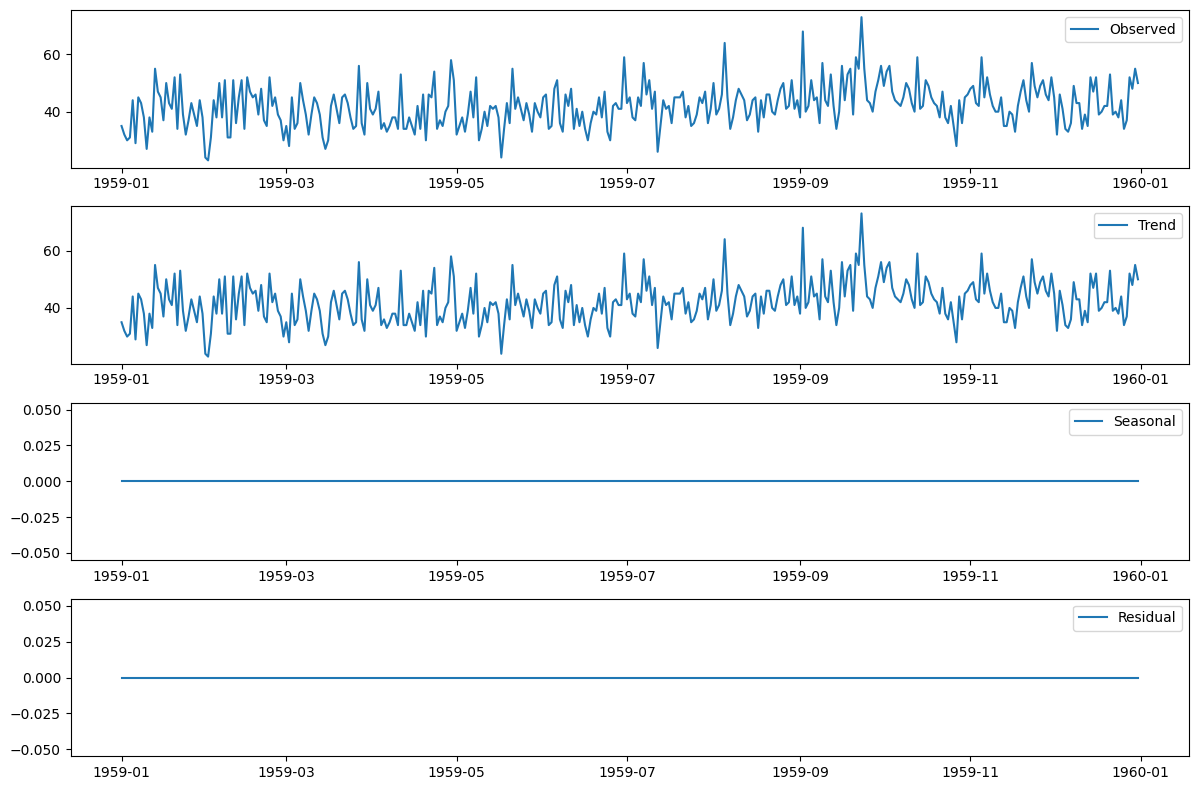

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(female_birth_data['births'], model='additive', period=1)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

# ***Training & Evaluation***

In [30]:
# Determine the size of the testing set (e.g., 20% of the data)
test_size = 0.2

# Calculate the number of rows for the testing set
num_rows = female_birth_data.shape[0]
num_rows_test = int(test_size * num_rows)

# Calculate the index at which to split the dataset
split_index = num_rows - num_rows_test

# Split the dataset into training and testing sets
train_data = female_birth_data.iloc[:split_index]
test_data = female_birth_data.iloc[split_index:]

# Display the shape of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

Training set shape: (292, 2)
Testing set shape: (73, 2)


In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the ARIMA model parameters (p, d, q)
p = 5  # Autoregressive (AR) order
d = 1  # Integrated (I) order (degree of differencing)
q = 0  # Moving Average (MA) order

# Fit the ARIMA model to the training data
model = ARIMA(train_data['births'], order=(p, d, q))
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# ***Prediction***

In [34]:
# Generate forecasts for the testing data
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
forecast = fitted_model.predict(start=start_index, end=end_index, typ='levels')

# Evaluate the model performance
mse = mean_squared_error(test_data['births'], forecast)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 6.8446197622615825


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


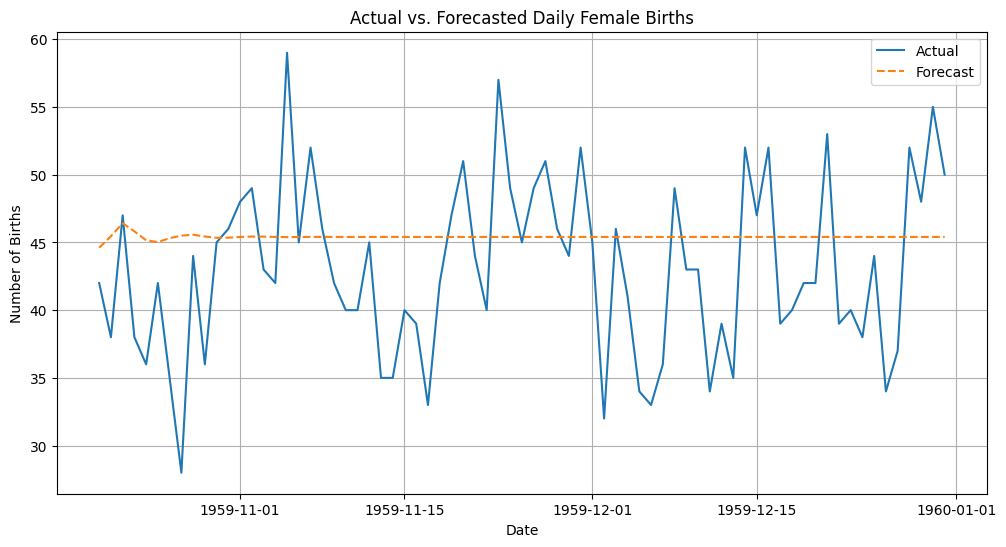

In [32]:
# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], test_data['births'], label='Actual')
plt.plot(test_data['date'], forecast, label='Forecast', linestyle='--')
plt.title('Actual vs. Forecasted Daily Female Births')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.grid(True)
plt.legend()
plt.show()

# ***Approach***

**1. Data Collection and Preprocessing :**

*   Gathered historical data on daily female births in California, spanning 12 months in 1959.

*   Preprocessed the dataset by converting the 'date' column to datetime format and setting it as the index.



**2. Exploratory Data Analysis (EDA) :**

*   Conducted exploratory data analysis to understand the characteristics of the dataset.

*   Visualized the time series plot of daily births to identify trends, seasonality, and any outliers.

*  Computed summary statistics such as mean, standard deviation, minimum, and maximum values to gain insights into the distribution of birth data.



**3. Modeling :**

*   Applied time series models, including ARIMA (AutoRegressive Integrated Moving Average), to the dataset.

*   Selected appropriate model parameters (p, d, q) based on the characteristics of the data.

*  Fitted the ARIMA model to the training data to capture the underlying patterns and seasonality.



**4. Model Evaluation :**

*   Evaluated the performance of the ARIMA model by calculating metrics such as Root Mean Squared Error (RMSE) between actual and forecasted values.

*   Assessed the accuracy of the model in predicting the number of daily female births for future time periods.



**5. Forecasting :**

*   Generated forecasts for the testing data using the fitted ARIMA model.

*   Produced predictions for future time periods, providing estimates of the expected number of female births in California.



***6. Insights and Findings : ***

*   Derived insights into the trends, seasonality, and overall patterns in daily female births in California.

*   Identified potential use cases for the forecasting model in healthcare resource planning, maternity services management, public health policy, and epidemiological research.

*  Highlighted the significance of the project's findings in improving maternal and child health outcomes and informing decision-making processes.



### **7. Conclusion :**

*   Summarized the project's objectives, approach, and key findings.

*   Emphasized the project's contributions to healthcare planning, public health policy development, and research in maternal and child health.

*  Suggested areas for future research and further analysis to enhance the accuracy and applicability of the forecasting model.

